In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
dataset.variety.value_counts()

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64

In [5]:
# the above statistic says that the dataset contains balanced dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# no null values are present in the dataset

#lets convert the dataset into fetaures and labels

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4:].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=33)

In [8]:
y_train.shape

(105, 1)

In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')
y_train = ct.fit_transform(y_train)
y_test = ct.transform(y_test)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [11]:
import tensorflow as tf

In [12]:
# Implemeting Artificial Neural Network 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100,'relu',input_dim=4))
model.add(tf.keras.layers.Dense(50,'relu'))
model.add(tf.keras.layers.Dense(50,'relu'))
model.add(tf.keras.layers.Dense(3,'softmax'))

model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 8,253
Trainable params: 8,253
Non-trainable params: 0
_________________________________________________________________


In [14]:
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)


Epoch 1/10
6/6 [==============================] - 1s 43ms/step - loss: 1.0483 - accuracy: 0.3429 - val_loss: 0.9267 - val_accuracy: 0.4889
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 0.9043 - accuracy: 0.7048 - val_loss: 0.8203 - val_accuracy: 0.7333
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 0.7990 - accuracy: 0.7905 - val_loss: 0.7255 - val_accuracy: 0.7333
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 0.6910 - accuracy: 0.8095 - val_loss: 0.6344 - val_accuracy: 0.7778
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5805 - accuracy: 0.8476 - val_loss: 0.5532 - val_accuracy: 0.7778
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.4739 - accuracy: 0.8667 - val_loss: 0.4872 - val_accuracy: 0.8000
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.8857 - val_loss: 0.4421 - val_accuracy: 0.8444
Epoch 8/10
6/6 [==============

In [18]:
import numpy as np

In [19]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 82.22222222222221


In [20]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_label,predict_label)

0.8222222222222222

In [25]:
# implementation of LogistcRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=33)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_la = le.fit_transform(y_train)
y_test_la = le.transform(y_test)

C:\Users\Mohd Faizan Umar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
X_train.shape,X_test.shape,y_train_la.shape,y_test_la.shape

((105, 4), (45, 4), (105,), (45,))

In [32]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train_la)

LogisticRegression()

In [34]:
y_pred_la = lg.predict(X_test)

In [35]:
accuracy_score(y_test_la,y_pred_la)

0.9555555555555556

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_la, y_pred_la)

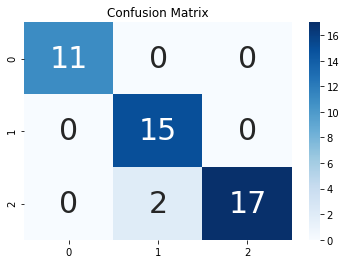

In [38]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [43]:
# training Random forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train_la)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test_la,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test_la, Y_prediction)
accuracy = accuracy_score(y_test_la,Y_prediction)
precision =precision_score(y_test_la, Y_prediction,average='micro')
recall =  recall_score(y_test_la, Y_prediction,average='micro')
f1 = f1_score(y_test_la,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[11  0  0]
 [ 0 15  0]
 [ 0  3 16]]
accuracy_random_Forest : 0.933
precision_random_Forest : 0.933
recall_random_Forest : 0.933
f1-score_random_Forest : 0.933


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train_la)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test_la,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train_la) * 100, 2)

cm = confusion_matrix(y_test_la, Y_pred)
accuracy = accuracy_score(y_test_la,Y_pred)
precision =precision_score(y_test_la, Y_pred,average='micro')
recall =  recall_score(y_test_la, Y_pred,average='micro')
f1 = f1_score(y_test_la,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
accuracy_KNN : 0.911
precision_KNN : 0.911
recall_KNN: 0.911
f1-score_KNN : 0.911


In [48]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train_la)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test_la,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train_la) * 100, 2)

cm = confusion_matrix(y_test_la, Y_pred)
accuracy = accuracy_score(y_test_la,Y_pred)
precision =precision_score(y_test_la, Y_pred,average='micro')
recall =  recall_score(y_test_la, Y_pred,average='micro')
f1 = f1_score(y_test_la,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
accuracy_Naive Bayes: 0.956
precision_Naive Bayes: 0.956
recall_Naive Bayes: 0.956
f1-score_Naive Bayes : 0.956


In [49]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train_la)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test_la,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train_la) * 100, 2)

cm = confusion_matrix(y_test_la, Y_pred)
accuracy = accuracy_score(y_test_la,Y_pred)
precision =precision_score(y_test_la, Y_pred,average='micro')
recall =  recall_score(y_test_la, Y_pred,average='micro')
f1 = f1_score(y_test_la,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[11  0  0]
 [ 0 14  1]
 [ 0  2 17]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


In [50]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train_la)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test_la,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train_la) * 100, 2)

cm = confusion_matrix(y_test_la, Y_pred)
accuracy = accuracy_score(y_test_la,Y_pred)
precision =precision_score(y_test_la, Y_pred,average='micro')
recall =  recall_score(y_test_la, Y_pred,average='micro')
f1 = f1_score(y_test_la,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
accuracy_DecisionTree: 0.911
precision_DecisionTree: 0.911
recall_DecisionTree: 0.911
f1-score_DecisionTree : 0.911
